# Map-a-day Day_08 - Better Buses, Better Cities

Hello! My name is Andrew and I'm an aspiring urban planner on a journey to learn how to build. What to build is the next big question I have to answer but let's take it one step at a time for now. This month, I've been making one map a day, hoping to make it to the end of the month with 31 maps. I started this project to 1) improve my coding skills and 2) get more familiar with spatial data. But I realized I haven't been documenting what I'm learning. So, I thought I'd start a Jupyter Notebook to log it all down. 

Today is day 8, and today feels like a good day to learn about GTFS feeds. 

The General Transit Feed Specification (GTFS) is a way for public transit agencies around the world the publish their transit data online in a standardized format. There are two kinds of GTFS feeds: "Schedule" and "Realtime." Today, we're only going to focus on GTFS Schedule.

GTFS Schedule is static public transit information. The base layer stops, routes, and trips and public transit system can take. While there are many data sets an agency can include in a GTFS Schedule, there are 7 required files:

agency.txt, routes.txt, trips.txt, stops.txt, stop_times.txt, calendar.txt and calendar_dates.txt.

The bread and butter of the GTFS Schedule files are stops, trips, and routes.

"stops.txt" includes information on all boarding areas / entrances and exits in the system.
"routes.txt" includes generic information on a specific collection of stops.
"trips.txt" includes time and direction specific indformation along a certain route.

Many agencies also include a shapes.txt file, which allows us to plot these routes on a map.

For this project, I'll be taking a look at the MTA's bus GTFS files. You can download them here: https://www.mta.info/developers

In [7]:
import pandas as pd

stops = pd.read_csv("../data/gtfs_b/stops.txt")
routes = pd.read_csv("../data/gtfs_b/routes.txt")
trips = pd.read_csv("../data/gtfs_b/trips.txt")
shapes = pd.read_csv("../data/gtfs_b/shapes.txt")

print(stops.columns)
print(routes.columns)
print(trips.columns)
print(shapes.head(10))

Index(['stop_id', 'stop_name', 'stop_desc', 'stop_lat', 'stop_lon', 'zone_id',
       'stop_url', 'location_type', 'parent_station'],
      dtype='object')
Index(['route_id', 'agency_id', 'route_short_name', 'route_long_name',
       'route_desc', 'route_type', 'route_color', 'route_text_color'],
      dtype='object')
Index(['route_id', 'service_id', 'trip_id', 'trip_headsign', 'direction_id',
       'block_id', 'shape_id'],
      dtype='object')
  shape_id  shape_pt_lat  shape_pt_lon  shape_pt_sequence
0   B10053     40.578329    -73.940025              10001
1   B10053     40.578252    -73.940719              10002
2   B10053     40.578142    -73.941669              10003
3   B10053     40.578042    -73.942579              10004
4   B10053     40.577996    -73.943016              10005
5   B10053     40.577996    -73.943016              20001
6   B10053     40.577942    -73.943529              20002
7   B10053     40.577912    -73.943769              20003
8   B10053     40.577842   

As we can see if the shapes.txt dataframe, each route is defined by a series of points (shape_pt_lon, shape_pt_lat) in a specific sequence (shape_pt_sequence). If we plot that sequence, we get a route!

Before we do this, let's wrangle our data togther. First, let's join our trips dataframe to our route dataframe.

In [22]:
trips_merged = pd.merge(left = trips, right = routes, on = "route_id", how = "left")

print(trips_merged.head(10))

  route_id     service_id                         trip_id  \
0     B82+  EN_O5-Weekday  EN_O5-Weekday-028500_SBS82_901   
1     B82+  EN_O5-Weekday  EN_O5-Weekday-034800_SBS82_901   
2     B82+  EN_O5-Weekday  EN_O5-Weekday-039800_SBS82_913   
3     B82+  EN_O5-Weekday  EN_O5-Weekday-047300_SBS82_913   
4     B82+  EN_O5-Weekday  EN_O5-Weekday-029700_SBS82_902   
5     B82+  EN_O5-Weekday  EN_O5-Weekday-036000_SBS82_902   
6     B82+  EN_O5-Weekday  EN_O5-Weekday-042100_SBS82_902   
7     B82+  EN_O5-Weekday  EN_O5-Weekday-049800_SBS82_902   
8     B82+  EN_O5-Weekday  EN_O5-Weekday-057000_SBS82_918   
9     B82+  EN_O5-Weekday  EN_O5-Weekday-065000_SBS82_918   

                              trip_headsign  direction_id  block_id  \
0  SELECT BUS BENSNHRST BAY 38 via FLATLNDS             1  37486831   
1   SELECT BUS SPRING CRK SEAVIEW via KINGS             0  37486831   
2  SELECT BUS BENSNHRST BAY 38 via FLATLNDS             1  37486843   
3   SELECT BUS SPRING CRK SEAVIEW via KINGS 

After the merge, we have a bit more context to our trips, including the route names and route colors. 

Now, let's merge our trips with the shape of each route.

In [23]:
shapes_merged = pd.merge(left = trips_merged, right = shapes, on = "shape_id", how = "left")

print(shapes_merged.head(10))

  route_id     service_id                         trip_id  \
0     B82+  EN_O5-Weekday  EN_O5-Weekday-028500_SBS82_901   
1     B82+  EN_O5-Weekday  EN_O5-Weekday-028500_SBS82_901   
2     B82+  EN_O5-Weekday  EN_O5-Weekday-028500_SBS82_901   
3     B82+  EN_O5-Weekday  EN_O5-Weekday-028500_SBS82_901   
4     B82+  EN_O5-Weekday  EN_O5-Weekday-028500_SBS82_901   
5     B82+  EN_O5-Weekday  EN_O5-Weekday-028500_SBS82_901   
6     B82+  EN_O5-Weekday  EN_O5-Weekday-028500_SBS82_901   
7     B82+  EN_O5-Weekday  EN_O5-Weekday-028500_SBS82_901   
8     B82+  EN_O5-Weekday  EN_O5-Weekday-028500_SBS82_901   
9     B82+  EN_O5-Weekday  EN_O5-Weekday-028500_SBS82_901   

                              trip_headsign  direction_id  block_id  \
0  SELECT BUS BENSNHRST BAY 38 via FLATLNDS             1  37486831   
1  SELECT BUS BENSNHRST BAY 38 via FLATLNDS             1  37486831   
2  SELECT BUS BENSNHRST BAY 38 via FLATLNDS             1  37486831   
3  SELECT BUS BENSNHRST BAY 38 via FLATLNDS 

Last step before making the map: we need to convert the (shape_pt_lon, shape_pt_lat) and create a GeoDataFrame.

In [27]:
import geopandas as gp

bus_gdf = gp.GeoDataFrame(
    shapes_merged,
    geometry = gp.points_from_xy(x = shapes_merged["shape_pt_lon"], y = shapes_merged["shape_pt_lat"], crs="EPSG:4326")
)

print(bus_gdf.columns)


Index(['route_id', 'service_id', 'trip_id', 'trip_headsign', 'direction_id',
       'block_id', 'shape_id', 'agency_id', 'route_short_name',
       'route_long_name', 'route_desc', 'route_type', 'route_color',
       'route_text_color', 'shape_pt_lat', 'shape_pt_lon', 'shape_pt_sequence',
       'geometry'],
      dtype='object')


Great! Now we have a GeoDataFrame with lots of point geometries. 

But we can't just plot as it is now. Remember: each point in shapes.txt must be connected in specific sequence, defined in the column "shape_pt_sequence." So, first we're going to sort all the values by shape_id and shape_pt_sequence so everything is in the right order. Then, once it's all in the right order, we will use the package Shapely to connect the points via LineString.

In [31]:
bus_gdf = bus_gdf.sort_values(by=['shape_id', 'shape_pt_sequence'], ascending=[True, True])

from shapely.geometry import LineString

lines = bus_gdf.groupby('shape_id')['geometry'].apply(LineString)

lines_gdf = gp.GeoDataFrame(lines, geometry="geometry").reset_index()

unique_bus_info = bus_gdf.drop_duplicates("shape_id").drop(columns="geometry")

bk_bus_routes = lines_gdf.merge(unique_bus_info, on="shape_id", how="left")

print(bk_bus_routes.columns)
print(bk_bus_routes.head(20))


Index(['shape_id', 'geometry', 'route_id', 'service_id', 'trip_id',
       'trip_headsign', 'direction_id', 'block_id', 'agency_id',
       'route_short_name', 'route_long_name', 'route_desc', 'route_type',
       'route_color', 'route_text_color', 'shape_pt_lat', 'shape_pt_lon',
       'shape_pt_sequence'],
      dtype='object')
   shape_id                                           geometry route_id  \
0    B10053  LINESTRING (-73.94 40.578, -73.94 40.578, -73....       B1   
1    B10057  LINESTRING (-73.94 40.578, -73.94 40.578, -73....       B1   
2    B10061  LINESTRING (-73.985 40.597, -73.985 40.597, -7...       B1   
3    B10062  LINESTRING (-73.94 40.578, -73.94 40.578, -73....       B1   
4    B10063  LINESTRING (-74.029 40.622, -74.029 40.622, -7...       B1   
5    B10064  LINESTRING (-73.965 40.577, -73.965 40.577, -7...       B1   
6    B10065  LINESTRING (-73.94 40.578, -73.941 40.578, -73...       B1   
7    B10066  LINESTRING (-73.94 40.578, -73.94 40.578, -73....      

Now we have a GeoDataFrame with all of the route information merged onto it. Let's plot this thing!

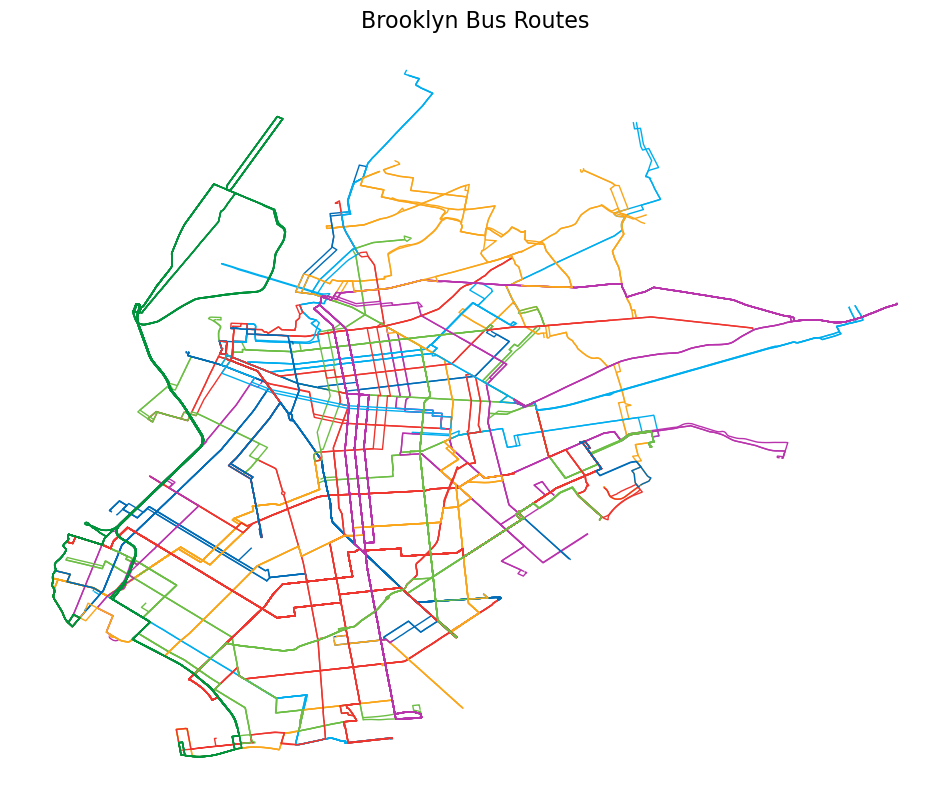

In [40]:
import matplotlib.pyplot as plt

bk_bus_routes["color"] = "#" + bk_bus_routes["route_color"]

fig, ax = plt.subplots(figsize=(12, 12))

bk_bus_routes.plot(ax=ax, color=bk_bus_routes["color"], linewidth=1, zorder=2)

ax.set_title('Brooklyn Bus Routes', fontsize=16)
ax.set_axis_off()
plt.savefig("/Users/andrew/Desktop/data-science/projects/map-a-day/map-a-day/day_08/bk_buses.png",
            dpi = 300,
            bbox_inches = "tight")

plt.show()
